Lea Heiniger  
Metaheuristics for optimization  
19.09.2022  
# Stochastic processes


In [1]:
import numpy as np
import math
from random import random
from copy import copy
import matplotlib.pyplot as plt

We define a function _frequency_ that will be usefull in the rest of the TP.

In [2]:
def frequency(events, n) :
    '''
    Function computing the frequency of each events

    Parameters :
     events -> dictionary containig the events and theire occurencies
     n -> number of events generated

     Returning :
      freq -> dictionary contaning the events and theire frequencys
     '''
    freq = {}
    for i in events :
        freq[i] = events[i]/n
    return freq

- **Simulation of a balanced dice**  
We defin a function _balancedDice_ that will simulate a N-faced balanced dice (each face has a probability 1/N)

In [3]:
def balancedDice(N) :
    '''
    Function simulating the roll of a balanced dice

    Parameters :
     N -> number of faces on the dice

    Returning :
     The face obtained
    '''
    return math.floor(N*random())+1

We use this function to simulate 1000000 rolls of a 6-faced ballanced dice.

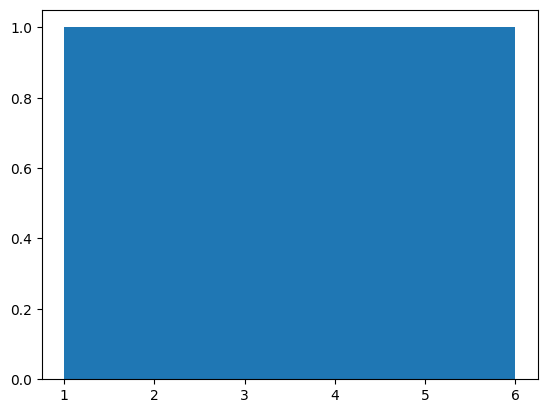

{'1': 0.166918,
 '2': 0.165945,
 '3': 0.166298,
 '4': 0.166908,
 '5': 0.167171,
 '6': 0.16676}

In [4]:
N = 6 #number of faces on the dice

n = 1000000 #number of rolls


rolls = {} #dictionary to count the occurrence of each face
for i in range(N) :
    rolls[str(i+1)] = 0

# We simulate n rolls
for r in range(n) :
    res = balancedDice(N)
    rolls[str(res)] += 1

# We compute the frequency of each face
freq = frequency(rolls, n)

plt.hist(rolls, bins=6)  # arguments are passed to np.histogram

plt.show()

freq

We can see on the histogram and the frequencies that each face is equiprobable.  
If the dice was unballanced the histogram would not have all values at the same level, the values with the bigest probability would apear higher than the ones with a lower probability.

- **Simulation of a biased coin toss**  
We define a function _biasedCoin_ that will simulate a biased coin with a probability P to obtain head based on the formula lambda = floor(r+P). lambda will be 1 with a probability P and 0 with a probability P-1.


In [5]:
def biasedCoin(P) :
    '''
    Function simulating the toss of a biased coin

    Parameters :
     P -> the probability of obtaining tail

    Returning :
     0 for tail and 1 for head
    '''
    return math.floor(random()+P)

Now we want to check if the function simulates correctly the biased coin. We simulate 1000000 toss with a probability P = 0.7 of obtaining head and we compute the frequency of each side.

In [6]:

P = 0.7 #probability of obtaining head

n = 1000000 #number of tosses

# We simulate n toss
toss = {"head":0, "tail":0} #dictionary to count the occurrences of tail and head
for r in range(n) :
    res = biasedCoin(P)

    if res == 0 :
        toss["tail"] += 1
    else :
        toss["head"] += 1

# We compute the frequencys of tail and head
freq = frequency(toss, n)
freq

{'head': 0.70103, 'tail': 0.29897}

We can see that the frequencies obtained match with the chosen probabilities

- **Simulation of a double biased coin toss**  
We defin a function _doubleBiasedCoins_ that simulate a double coin toss based on the function _biasedCoin_ with a probability P1 of obtaining head for the first coin and P2 for the second.

In [7]:
def doubleBiasedCoins(P1,P2) :
    '''
    Function simulating the toss of two biased coins

    Parameters :
     P1 -> the probability of obtaining head for the first coin
     P2 -> the probability of obtaining head for the second coin

    Returning :
     a tuple (res1, res2) with values 1 for head and 0 for tail
    '''
    res1 = biasedCoin(P1)
    res2 = biasedCoin(P2)

    return (res1, res2)

We simulate 1000000 double toss with probabilities P1=0.7 and P2=0.2.

In [8]:
P1 = 0.7 #probability of obtaining head for the first coin
P2 = 0.2 #probability of obtaining head for the second coin

n = 1000000 #number of tosses

# We simulate n toss
toss = {"head-head":0, "head-tail":0, "tail-head":0, "tail-tail":0} #dictionary to count the occurrences of tail and head
for r in range(n) :
    res1, res2 = doubleBiasedCoins(P1, P2)

    if res1 == 0 :
        if res2 == 0 :
            toss["tail-tail"] += 1
        else :
            toss["tail-head"] += 1
    else :
        if res2 == 0 :
            toss["head-tail"] += 1
        else :
            toss["head-head"] += 1

# We compute the frequencys of tail and head
freq = frequency(toss, n)
freq

{'head-head': 0.140356,
 'head-tail': 0.559941,
 'tail-head': 0.059866,
 'tail-tail': 0.239837}

From these combined frequencies we compute the frequency for each side of the coins.

In [9]:
freq1 = {"head":freq["head-head"]+freq["head-tail"], "tail":freq["tail-head"]+freq["tail-tail"]}
freq2 = {"head":freq["head-head"]+freq["tail-head"], "tail":freq["head-tail"]+freq["tail-tail"]}

print("for coin 1 : ", freq1)
print("for coin 2 : ", freq2)


for coin 1 :  {'head': 0.7002970000000001, 'tail': 0.299703}
for coin 2 :  {'head': 0.200222, 'tail': 0.799778}


We can see that the freqiencies for both coins are respected.

- **Roulette method**  
We define a function _rouletteMethod_ that implements the roulette method.

In [10]:
def rouletteMethod(P) :
    '''
    Function implementing the roulette method

    Parameters :
     P -> the probability of obtaining each event

    Returning :
     The event obtained
    '''
    Pcumul = [sum(P[0:x:1]) for x in range(0, len(P)+1)]
    Pcumul.pop(0)
    r = random()
    for i in range(len(Pcumul)) :

        if Pcumul[i] > r :

            return i

We check if the frequency obtained for 1000000 simulations matches the chosen probabilities P.

In [11]:
N = 6 #number of possible events
P = [0.25, 0.25, 0.25, 0.125, 0.0625, 0.0625] #probability of obtaining each event

n = 1000000 #number of try

events = {} #dictionary to count the occurrence of each event
for i in range(N) :
    events[str(i)] = 0

# We generate n times events
for r in range(n) :
    res = rouletteMethod(P)
    events[str(res)] += 1

# We compute the frequency of each event
freq = frequency(events, n)
freq

{'0': 0.249775,
 '1': 0.250762,
 '2': 0.24922,
 '3': 0.124985,
 '4': 0.06282,
 '5': 0.062438}

We can see that the chosen probabilities are respected.